# Task: House Prices - Advanced Regression Techniques
Link: [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing to analysis

In [18]:
df = pd.read_csv("../data/house_pricing/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.shape

(1460, 81)

In [20]:
df.isnull().sum()[df.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<Axes: >

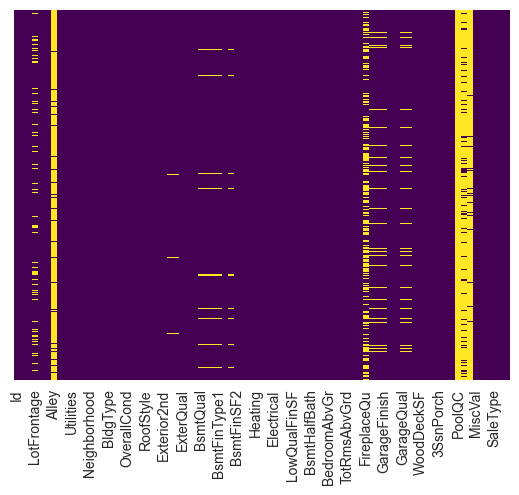

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Fill missing values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())  # mean cuz it's float

In [24]:
df.drop(['Alley', 'GarageYrBlt', 'MiscFeature', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [36]:
for col in ['BsmtCond', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']:
    df[col] = df[col].fillna(df[col].mode()[
                                 0])  # mode cuz it's categorical feature, we should replace it with most used. But ideally we should go feature by feature and try to understand what this col is.

In [26]:
df.shape

(1460, 76)

In [27]:
df.drop(['Id'], axis=1, inplace=True)

In [37]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [38]:
df.shape

(1460, 75)

In [ ]:
df.head()

## Handle Test Dataset to extruct all possible feature values

In [50]:
test_df = pd.read_csv('../data/house_pricing/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
test_df.shape

(1459, 80)

In [53]:
test_df.isnull().sum()[test_df.isnull().sum() != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [55]:
test_df.drop(['Alley', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [56]:
categorical_col = test_df.select_dtypes(include=['object']).columns
for col in categorical_col:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [58]:
non_categorical_col = test_df.select_dtypes(exclude=['object']).columns
for col in non_categorical_col:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

In [59]:
test_df.isnull().sum()[test_df.isnull().sum() != 0]

Series([], dtype: int64)

In [60]:
test_df.shape

(1459, 74)

In [62]:
test_df.to_csv('../data/house_pricing/clear_test.csv', index=False)

## Handling categorical features

In [47]:
categorical_col = df.select_dtypes(include=['object']).columns
len(categorical_col)

39

In [70]:
def categorical_one_hot_cols(final_df, cols):
    df_final = final_df
    i = 0
    for fields in cols:
        df1 = pd.get_dummies(final_df[fields], drop_first=True)

        final_df.drop([fields], axis=1, inplace=True)
        df_final = df1.copy() if i == 0 else pd.concat([df_final, df1], axis=1)
        i += 1

    df_final = pd.concat([final_df, df_final], axis=1)

    return df_final

In [49]:
main_df = df.copy()

In [63]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [71]:
final_df = pd.concat([df, test_df], axis=0)

In [72]:
final_df.shape

(2919, 75)

In [73]:
final_df = categorical_one_hot_cols(final_df, categorical_col)

In [74]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
df_train, df_test = final_df.iloc[:1422, :], final_df.iloc[1422:, :]

In [77]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\sasha\AppData\Local\Temp\ipykernel_53320\2086669381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis=1, inplace=True)


In [78]:
df_test.shape

(1497, 175)

In [79]:
x_train, y_train = df_train.drop(['SalePrice'], axis=1), df_train['SalePrice']

## Prediction and selecting the Algorithm

### XGBoost

In [80]:
import xgboost

regressor = xgboost.XGBRegressor()

#### Hyper Parameter Optimization

In [81]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

#### Fit

In [82]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=hyperparameter_grid,
                               cv=5,
                               n_iter=50,
                               scoring='neg_mean_absolute_error',
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [83]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [84]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
best = random_cv.best_estimator_

#### Save model

In [86]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(best, open(filename, 'wb'))

In [88]:
df_test.shape

(1497, 175)

In [89]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1422,120,37.000000,4435,6,5,2003,2003,170.0,686.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1423,80,70.049958,19690,6,7,1966,1966,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
1424,20,70.049958,9503,5,5,1958,1983,0.0,457.0,374.0,...,0,0,0,0,1,0,0,0,1,0
1425,20,80.000000,10721,6,6,1959,1959,243.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1426,60,81.000000,10944,7,5,1994,1994,448.0,1000.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [90]:
y_pred = best.predict(df_test)

In [91]:
y_pred

array([138180.89, 184401.86, 138141.31, ..., 185406.4 , 123615.04,
       230278.89], dtype=float32)

In [92]:
##Create Sample Submission file and Submit using ANN
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('../data/house_pricing/sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)